In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import os
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import joblib
import pickle

In [4]:
target_1 = []
target_2 = []
target_3 = []

surface_1 = []
surface_2 = []
surface_3 = []

surfaces = []

# Load the data from CSV files for each surface

In [62]:
for i in range(1, 200):  #107
    filename = 'D:\FYP_ML\Processed Data\S1\S1_' + str(i) +'.csv'
    df = pd.read_csv(filename, header=0)
    surface_1.append(df.values)
    target_1.append('Surface 1')

In [63]:
for i in range(1, 200):  #107
    filename = 'D:\FYP_ML\Processed Data\S2\S2_' + str(i) +'.csv'
    df = pd.read_csv(filename, header=0)
    surface_2.append(df.values)
    target_2.append('Surface 2')

In [64]:
for i in range(1, 200):  #107
    filename = 'D:\FYP_ML\Processed Data\S3\S3_' + str(i) +'.csv'
    df = pd.read_csv(filename, header=0)
    surface_3.append(df.values)
    target_3.append('Surface 3')

In [65]:
#df.keys()
#target

In [66]:
#surfaces.isnull().sum()
#np.isnan(df).sum()

In [67]:
# extract the time series data and the corresponding labels
X1 = np.array(surface_1)
X1 = X1.reshape(X1.shape[0], -1)

X2 = np.array(surface_2)
X2 = X2.reshape(X2.shape[0], -1)

X3 = np.array(surface_3)
X3 = X3.reshape(X3.shape[0], -1)

y1 = np.array(target_1)
y2 = np.array(target_2)
y3 = np.array(target_3)
#y = y.reshape(y.shape[0], -1)

In [68]:
#pd.Series(y).isnull().sum()

In [69]:
#X

In [70]:
# split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=20)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=20)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=20)

X_test = np.concatenate((X1_test,X2_test,X3_test), axis=0)
X_train = np.concatenate((X1_train,X2_train,X3_train), axis=0)
y_test = np.concatenate((y1_test,y2_test,y3_test), axis=0)
y_train = np.concatenate((y1_train,y2_train,y3_train), axis=0)
#X
#X_train

In [71]:
len(X_train[0])

180000

In [72]:
len(X1_train[1])

180000

In [73]:
# initialize and fit the TSF classifier
model = svm.SVC(kernel='rbf', C=100, gamma='auto')

In [74]:
model.fit(X_train, y_train)

SVC(C=100, gamma='auto')

In [75]:
#model.save('Object_Classification_Model')
#model = tf.keras.models.load_model('Object_Classification_Model')

In [76]:
# predict the class labels of new data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8314814814814815

Confusion matrix, without normalisation
[[134  46   0]
 [  0 180   0]
 [  0  45 135]]


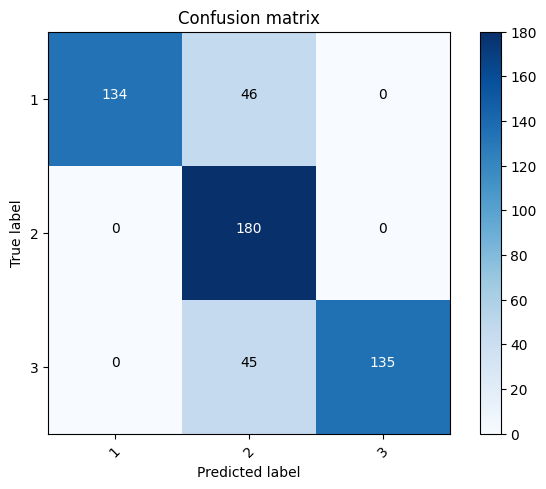

In [77]:
#plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, 
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalised confusion matrix")
  else:
    print("Confusion matrix, without normalisation")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j], fmt),
        horizontalalignment='center',
        color="white" if cm[i, j] > thresh else "black")


cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm, list(range(1,4)))
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [78]:
filename = "Completed_model.joblib"
joblib.dump(model, filename)

['Completed_model.joblib']